In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#1.과거의 임신 횟수
#2.포도당 부하 검사 2시간 후 공복 혈당 농도
#3.확장기 혈압
#4.삼두근 피부 주름 두께
#5.혈청 인슐린
#6.BMI (체질량 지수)
#7.당뇨병 가족력
#8.나이
#class : 1(당뇨), 0(정상)

df = pd.read_csv('./dataset/pima-indians-diabetes.csv', names = ["pregnant", "plasma", "pressure", "thickness", 
                "insulin", "BMI", "pedigree", "age", "class"])

In [11]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info

<bound method DataFrame.info of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     class  
0        1  
1        0  
2        1  
3  

In [14]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
df[['plasma', 'insulin', 'class']]

,plasma,insulin,class
0,148,0,1
1,85,0,0
2,183,0,1
3,89,94,0
4,137,168,1
...,...,...,...
763,101,180,0
764,122,0,0
765,121,112,0
766,126,0,1


In [16]:
df.loc[5:12,['plasma', 'class', 'insulin', 'BMI']]

,plasma,class,insulin,BMI
5,116,0,0,25.6
6,78,1,88,31.0
7,115,0,0,35.3
8,197,1,543,30.5
9,125,1,0,0.0
10,110,0,0,37.6
11,168,1,0,38.0
12,139,0,0,27.1


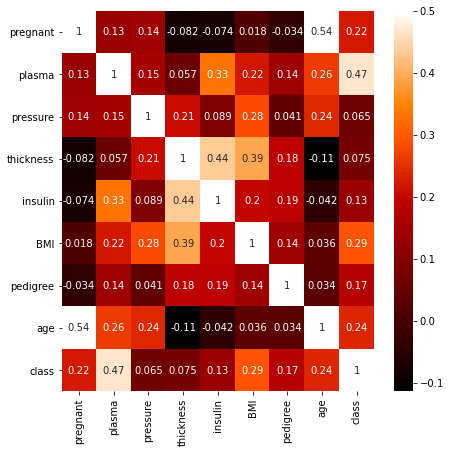

In [17]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(7,7))

sns.heatmap(df.corr(), linewidths=0, vmax=0.5, cmap=colormap, linecolor='white', annot = True)
plt.show()

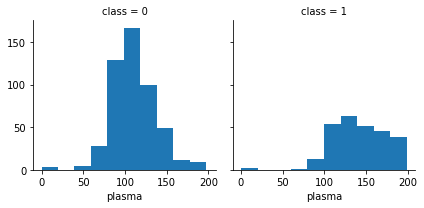

In [18]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy
import tensorflow as tf

numpy.random.seed(3)
tf.random.set_seed(3)

dataset1 = numpy.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter = ',')
X = dataset1[:, 0:8]
Y = dataset1[:, 8]

In [22]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics=['accuracy'])

In [24]:
model.fit(X, Y, epochs = 200, batch_size = 10)

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 625us/sample - loss: 1.0593 - accuracy: 0.6094
Epoch 2/200
768/768 [==============================] - 0s 132us/sample - loss: 0.6575 - accuracy: 0.6471
Epoch 3/200
768/768 [==============================] - 0s 132us/sample - loss: 0.6424 - accuracy: 0.6471
Epoch 4/200
768/768 [==============================] - 0s 151us/sample - loss: 0.6265 - accuracy: 0.6719
Epoch 5/200
768/768 [==============================] - 0s 122us/sample - loss: 0.6221 - accuracy: 0.6641
Epoch 6/200
768/768 [==============================] - 0s 130us/sample - loss: 0.6261 - accuracy: 0.6758
Epoch 7/200
768/768 [==============================] - 0s 121us/sample - loss: 0.6194 - accuracy: 0.6784
Epoch 8/200
768/768 [==============================] - 0s 133us/sample - loss: 0.6133 - accuracy: 0.6602
Epoch 9/200
768/768 [==============================] - 0s 128us/sample - loss: 0.6178 - accuracy: 0.6667
Epoch 10/200
768/768 [============

768/768 [==============================] - 0s 157us/sample - loss: 0.5605 - accuracy: 0.7214
Epoch 79/200
768/768 [==============================] - 0s 181us/sample - loss: 0.5613 - accuracy: 0.7227
Epoch 80/200
768/768 [==============================] - 0s 155us/sample - loss: 0.5609 - accuracy: 0.7161
Epoch 81/200
768/768 [==============================] - 0s 145us/sample - loss: 0.5588 - accuracy: 0.7070
Epoch 82/200
768/768 [==============================] - 0s 164us/sample - loss: 0.5577 - accuracy: 0.7357
Epoch 83/200
768/768 [==============================] - 0s 141us/sample - loss: 0.5534 - accuracy: 0.7318
Epoch 84/200
768/768 [==============================] - 0s 145us/sample - loss: 0.5589 - accuracy: 0.7318
Epoch 85/200
768/768 [==============================] - 0s 146us/sample - loss: 0.5599 - accuracy: 0.7161
Epoch 86/200
768/768 [==============================] - 0s 126us/sample - loss: 0.5521 - accuracy: 0.7083
Epoch 87/200
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 118us/sample - loss: 0.5362 - accuracy: 0.7383
Epoch 155/200
768/768 [==============================] - 0s 115us/sample - loss: 0.5429 - accuracy: 0.7161
Epoch 156/200
768/768 [==============================] - 0s 125us/sample - loss: 0.5421 - accuracy: 0.7240
Epoch 157/200
768/768 [==============================] - 0s 116us/sample - loss: 0.5430 - accuracy: 0.7292
Epoch 158/200
768/768 [==============================] - 0s 116us/sample - loss: 0.5473 - accuracy: 0.7227
Epoch 159/200
768/768 [==============================] - 0s 116us/sample - loss: 0.5406 - accuracy: 0.7409
Epoch 160/200
768/768 [==============================] - 0s 114us/sample - loss: 0.5322 - accuracy: 0.7422
Epoch 161/200
768/768 [==============================] - 0s 116us/sample - loss: 0.5304 - accuracy: 0.7318
Epoch 162/200
768/768 [==============================] - 0s 130us/sample - loss: 0.5266 - accuracy: 0.7396
Epoch 163/200
768/768 [============================

In [25]:
print('적중률: %0.4f' %(model.evaluate(X, Y)[1]))

768/768 [==============================] - 0s 146us/sample - loss: 0.5304 - accuracy: 0.7539
적중률: 0.7539


In [26]:
print(f"적중률 : {model.evaluate(X, Y)[1]}")

768/768 [==============================] - 0s 40us/sample - loss: 0.5304 - accuracy: 0.7539
적중률 : 0.75390625
